<a href="https://colab.research.google.com/github/Maithraanand/Convolutional-Neural-Networks/blob/main/Maithraanand_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


**Load the data**

In [6]:
import pandas as pd

df = pd.read_csv('New 1000 Sales Records.csv')

**Preprocess the data**

In [7]:
# Select features and target
features = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost']
target = 'Total Profit'

X = df[features].values
y = df[target].values

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input for CNN (samples, time steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


**Create and Train the model**

In [8]:
model = keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(5, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 319636045824.0000 - val_loss: 248263622656.0000
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 309768716288.0000 - val_loss: 248260771840.0000
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 315701723136.0000 - val_loss: 248253890560.0000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 301313261568.0000 - val_loss: 248240488448.0000
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 319692275712.0000 - val_loss: 248216649728.0000
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322323677184.0000 - val_loss: 248177819648.0000
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 291483877376.0000 - val_loss: 248122654720.0000
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 319086231552.0000 - val_loss: 248044519424.0000
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 288472629248.0000 - val_loss: 247944396800.0000
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

**Evaluate the Model**

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Validation MSE: 198057641934.18057
Validation R2 Score: -0.5358930957275707


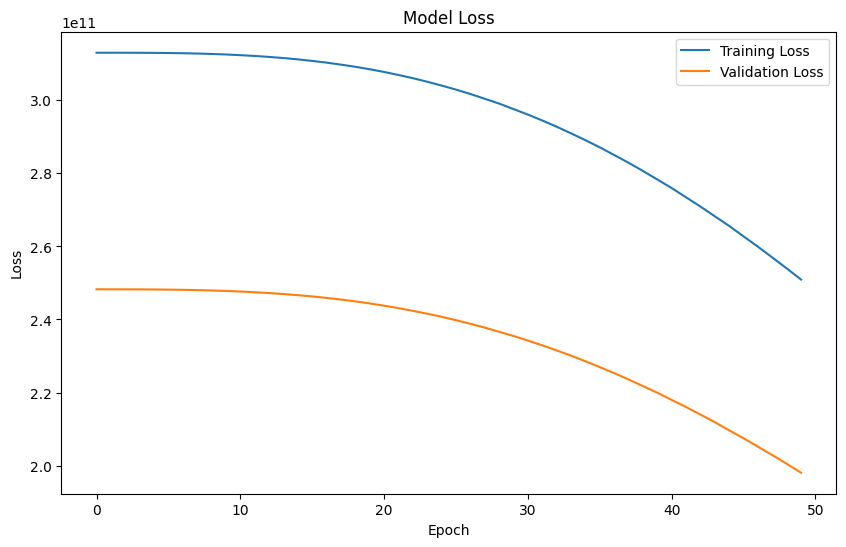

In [9]:
# Evaluate the model
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Validation MSE: " + str(mse))
print("Validation R2 Score: " + str(r2))

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()